# Lab 7

## Objectives
To construct and study the function of the volume unit meter (VU Meter). 

### Vout1-pp

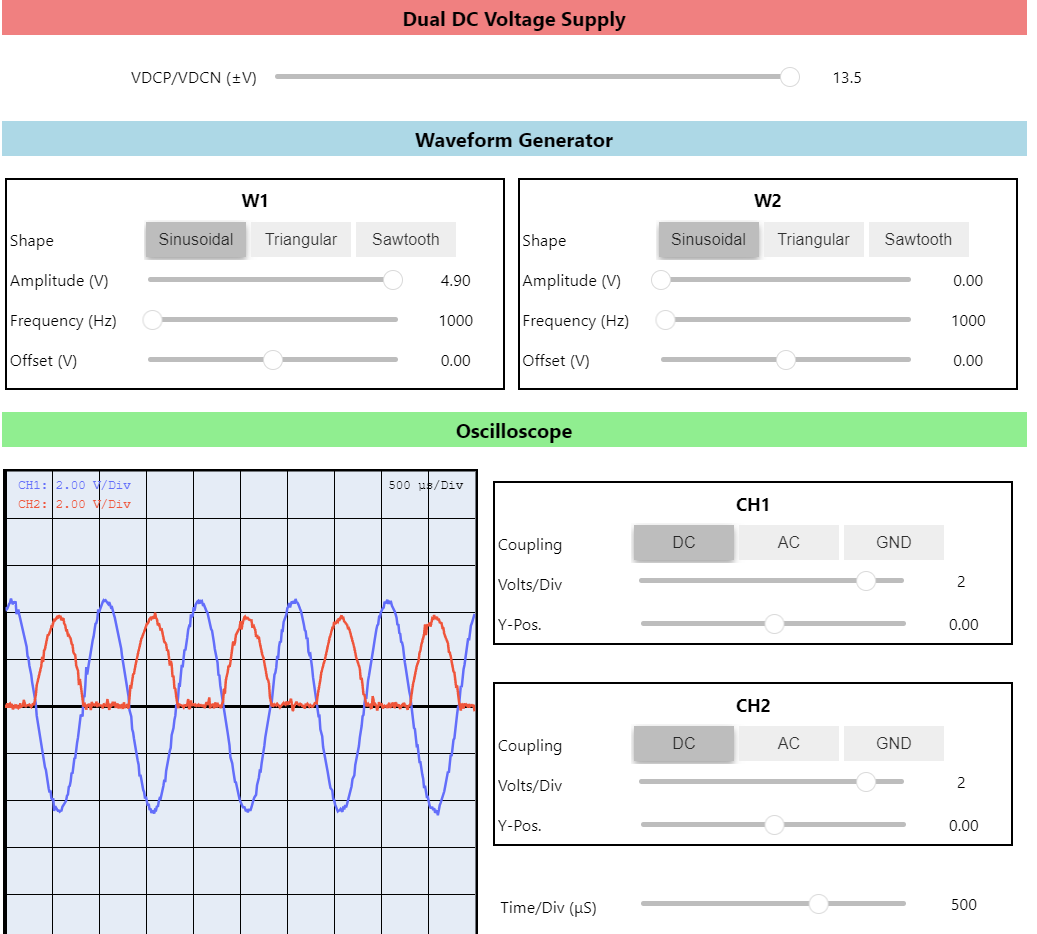

### Vout2-pp

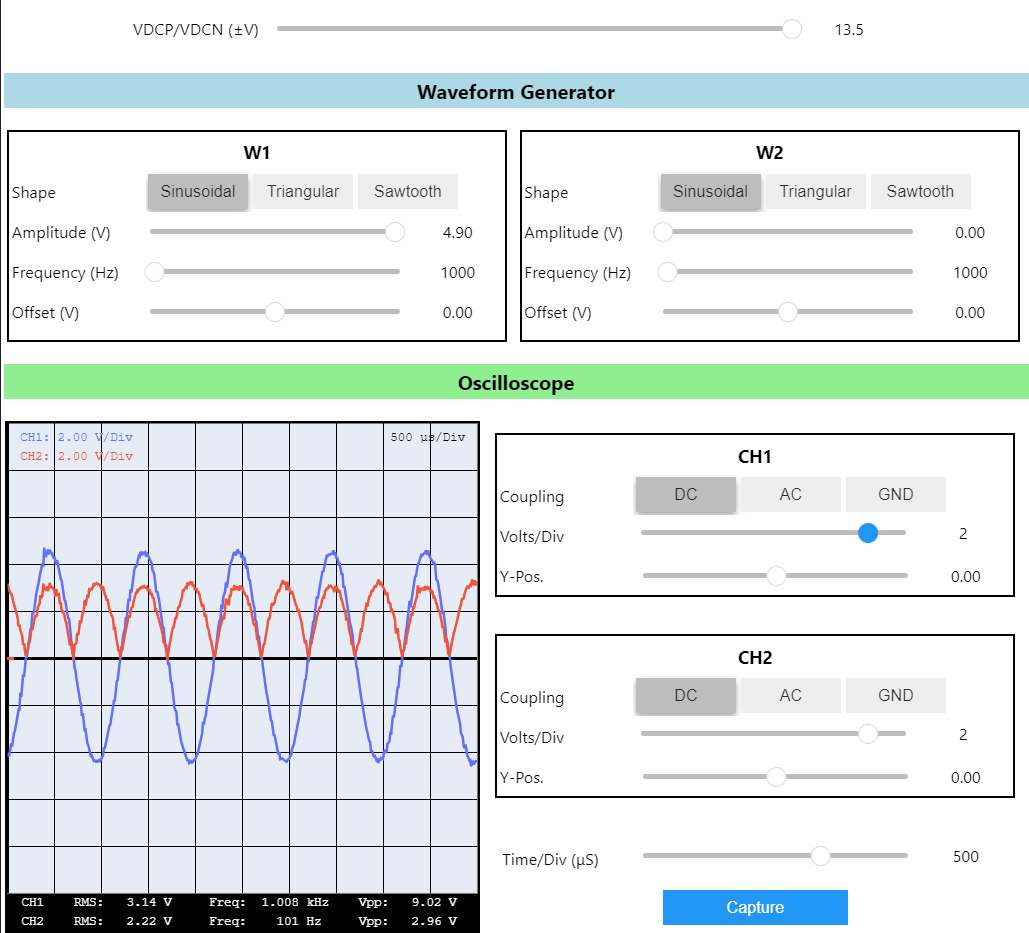

### Vout3-pp (RMS)

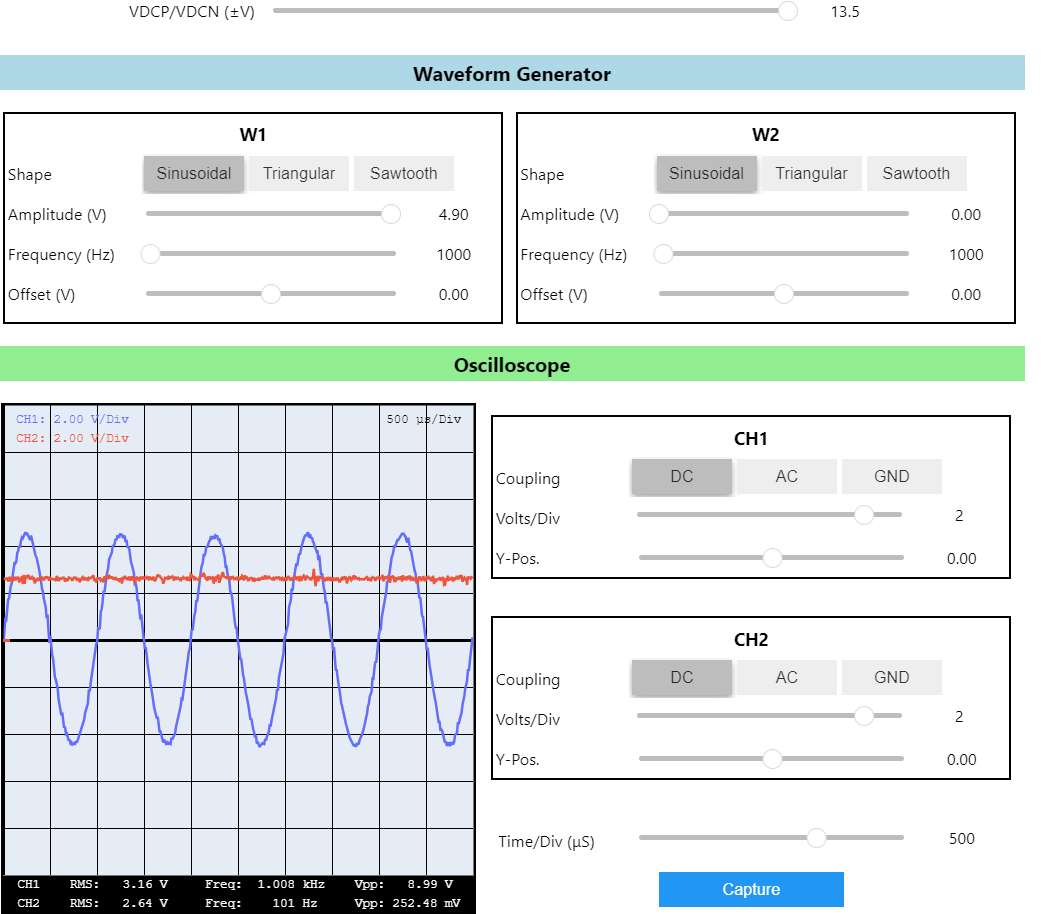

![alt text](image.png)

### VU Meter gain measurement

### VU Meter gain characterization

In [17]:
import numpy as np 
import plotly.graph_objs as go
from plotly.subplots import make_subplots
 
vpp_IN = np.array([8.98,7.02,7.18,5.2,5.26,3.46,3.54,1.56,1.76])  
v_OUT_01 = np.array([3.84,3.2,3.28,2.56,2.5,1.9,1.88,1.22,1.27]) 
v_OUT_02 = np.array([3.1,2.34,2.43,1.74,1.76,1.2,1.21,0.64363,0.65572]) 
vrms_OUT_03 = np.array([2.64,1.96,2.02,1.36,1.32,0.7539,0.81569,0.24682,0.2949]) 

gain_v_OUT_02 = (2*v_OUT_02)/vpp_IN

fig = go.Figure() 
#fig.update_xaxes(type='log')
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=vpp_IN, y=gain_v_OUT_02, mode='markers', name='V<sub>OUT2</sub> Gain'),secondary_y=False) 
fig.add_trace(go.Scatter(x=vpp_IN, y=vrms_OUT_03, mode='markers', name='V<sub>OUT3</sub> RMS'),secondary_y=True) 
fig.update_xaxes(title_text="V<sub>IN</sub>-pp")
fig.update_yaxes(title_text="<b>primary</b> V<sub>OUT2</sub> Gain", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> V<sub>OUT3</sub> RMS", secondary_y=True)
#fig.update_layout(xaxis_title='V<sub>IN</sub>-pp', yaxis_title='V<sub>OUT3</sub> RMS (V)',yaxis_title = ) 

coef = np.polyfit(vpp_IN, gain_v_OUT_02, deg=1) # deg=1 for order 1 polynomial (linear)
fit = coef[0]*vpp_IN + coef[1]
lab_temp = 25 # laboratory temperature
fig.add_trace(go.Scatter(x=vpp_IN, y=fit, mode='lines', line=dict(dash='dash'),
 name='Best fit for V<sub>OUT2</sub> Gain'))
coef = np.polyfit(vpp_IN, vrms_OUT_03, deg=1) # deg=1 for order 1 polynomial (linear)
fit = coef[0]*vpp_IN + coef[1]
lab_temp = 25 # laboratory temperature
fig.add_trace(go.Scatter(x=vpp_IN, y=fit, mode='lines', line=dict(dash='dash'),
 name='Best fit for V<sub>OUT3</sub> RMS'))

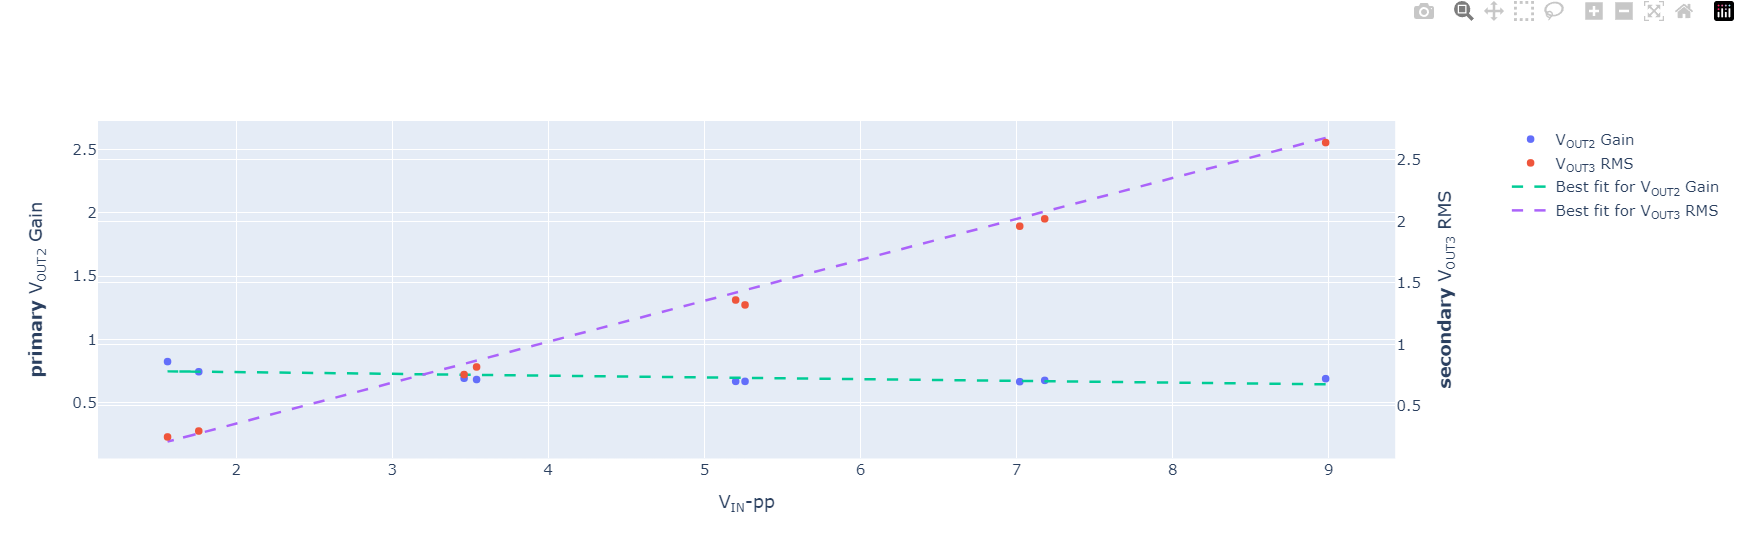

In [20]:
total_gain_out2 = 0.0
for i in range(len(gain_v_OUT_02)):
    total_gain_out2 += gain_v_OUT_02[i]

print("Average Gain (Vout2-pp)", total_gain_out2/9.0 )


Average Gain (Vout2-pp) 0.7022180900271009


The average gain from my measured values is around 0.702. This is very close to the theoretical gain value of 0.7

The function of a VU meter can be met as the the plot of Vout3/Vin produces a linear best fit line. Which indicates that the Vout3 follows Vin linearly.

### Open-Ended Questions
1. What does the two diodes do in the VU Meter? Explain using the waveforms observed at 𝑉OUT1 and 𝑉OUT2. 

ANS: The first diode acts as a full-wave rectifier. The second diode acts as a peak detector. Together with the capacitor, it detects and holds the peak voltage levels of the output. 


2. What happens to 𝑉OUT3 if there is a DC offset at 𝑉IN? 

ANS: VOUT3 will produce an inaccurate reading as the DC offset from the Vin will be amplified and cause the Vout3 to change. Too high of a DC offset might cause damage to the amplifier. 


3. At what volume, i.e., PA output amplitude, does the VU Meter fails to function? 

ANS: From the voltage source of the op-amp, a volume that will cause the Op-amp to saturate to 13.5V will cause the Vu meter to fail as it is limited by the voltage source of the op amp. 